In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
data = pd.read_csv('Grocery.csv',index_col=[0],header=[0,1], skipinitialspace=True)

In [4]:
grand_total = data.iloc[:,[4,9,14,19,24,29,34,39]].sum(axis=1,skipna=True)
gst_total = data.iloc[:,[3,8,13,18,23,28,33,38]].sum(axis=1,skipna=True)

In [5]:
data2 = pd.DataFrame()
data2['Grand Total'] = grand_total
data2['GST Total'] = gst_total

In [6]:
data_std = stats.zscore(data2)
km = KMeans(n_clusters=5, random_state=0)
km.fit(data_std)
labels = km.labels_
data2['clusters'] = labels

In [7]:
data2

,Grand Total,GST Total,clusters
Grocery,,,
Rice,2504.0,0.00,4
Jowar,96.0,0.00,0
Split Green Gram,1061.5,0.00,2
Split Red Gram,905.0,0.00,2
Split Black Gram,232.0,0.00,0
Sugar,657.5,31.30,2
Wheat,900.0,0.00,2
Cooking Oil,2657.0,126.52,3
Tide,1515.0,0.00,2


/home/mayur/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


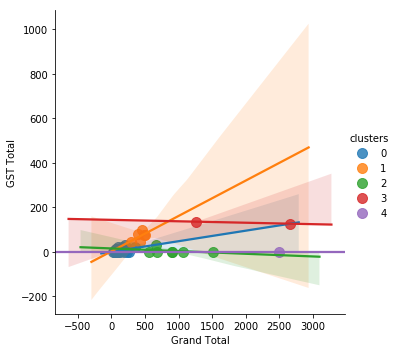

In [8]:
sns.lmplot('Grand Total','GST Total', data = data2 , hue = 'clusters',scatter_kws={'s':100})

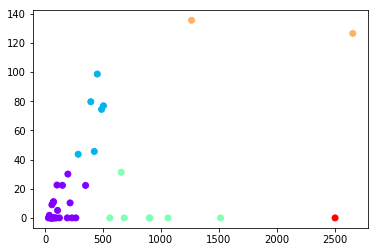

In [9]:
fig , ax = plt.subplots()
ax = plt.scatter(data2['Grand Total'], data2['GST Total'], c = data2['clusters'] , cmap = 'rainbow')